# Predator-Prey Systems: Lotka-Volterra model


The Lotka-Volterra model is a mathematical representation used to describe the dynamics of biological systems where two species interact, typically referred to as predator and prey. It was developed independently by Alfred Lotka and Vito Volterra in the 1920s.

The model is based on a set of differential equations that describe the rate of change of the population sizes of the predator and prey species over time. The assumptions of the model include the existence of only two species (predator and prey), the direct proportionality of population change to size, the total dependence of predators on prey as their sole food supply, and the absence of prey food depletion.

The Lotka-Volterra equations are typically presented as follows:


## The Lotka-Volterra Equations

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/79752d662d4760abcc84c6f0bb94d708f17ff442)


From the above equation, the parameters can be thought of as the following:

* $\frac{dx}{dt}$ = growth rate of rabbit population
* $\frac{dy}{dt}$ = growth rate of fox population

* $x$ = rabbit (prey) population 
* $y$ = fox (predator) population

* $\alpha$ = growth rate of rabbits
* $\beta$ = death rate of rabbits due to predatation from foxes
* $\gamma$ = natural death rate of foxes
* $\delta$ = factor describing how many consumed rabbits create a new fox

### Physical Meaning of the Equations
The equations describe how the populations of prey and predators change over time based on interactions between them. For instance, the growth rate of the prey species is influenced by both its intrinsic growth rate ($\alpha$) and the predation pressure from the predator species ($\beta xy$), while the growth rate of the predator species is influenced by the availability of prey ($\delta xy$) and the predator's death rate ($\gamma y$).

* The term $\alpha x$ in the first equation indicates that the prey reproduces exponentially, as it is assumed that the food amount for the prey is always sufficient.

* The rate of decreasing the prey’s population (predation) is proportional to the product of the number of preys and the number of predators. It is represented in the first equation as the term $\beta xy$. If there is no population of predators, no decrease in the population of prey can occur.

* The predator equation indicates that its growth rate is proportional to the product of the number of preys and the number of predators (the term $\delta xy$). If there is no predator, no reproduction of predator will occur.

* The decrease in predator population is due to natural death ($\gamma y$).




From the above equations, we can conclude that the Lotka-Volterra model makes several assumptions for the dynamics of predator-prey systems. Some of which are as follows:

* The rabbit population is provided with limitless food
* The rate of change of the populations are proportional to their size
* The foxes eat only the rabbits, and are entirely dependent on them as a food source
* The foxes have unlimited appetite


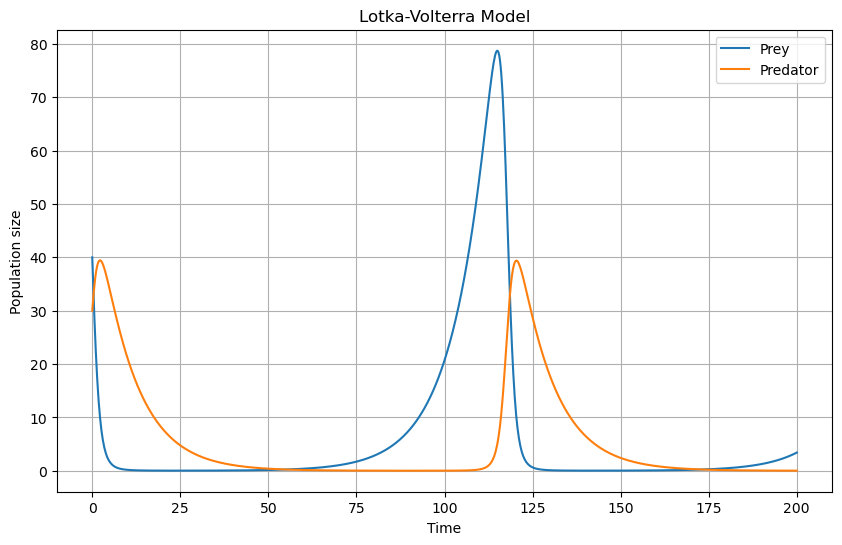

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def lotka_volterra(t, y, alpha, beta, delta, gamma):
    prey, predator = y
    prey_change = alpha * prey - beta * prey * predator
    predator_change = delta * prey * predator - gamma * predator
    return [prey_change, predator_change]

# Initial population sizes
initial_prey = 40
initial_predator = 30

# Parameters
alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1

# Time span
t_span = (0, 200)

# Solve the differential equations
solution = solve_ivp(lotka_volterra, t_span, [initial_prey, initial_predator], args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 200, 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Prey')
plt.plot(solution.t, solution.y[1], label='Predator')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()

## Prey population dynamics in the absence of predator

In the absence of predators (assuming $\beta = 0$ in Lotka-Volterra equations), the prey population dynamics would be solely determined by its intrinsic growth rate ($\alpha$) and natural death rate ($\gamma$).

Let's consider the Lotka-Volterra equation for the prey population:
$\frac{dx}{dt} = \alpha x - \beta xy $

With $\beta = 0$, the equation simplifies to:
$\frac{dx}{dt} = \alpha x $

This is a simple exponential growth equation, where the rate of change of the prey population is directly proportional to the size of the population ($x$), with the constant of proportionality being the intrinsic growth rate ($\alpha$).

The solution to this equation is given by:
$x(t) = x_0 e^{\alpha t}$

where:
* $x(t)$ is the population of prey at time t,
* $x_0$ is the initial population of prey,
* $\alpha $ is the intrinsic growth rate of the prey,
* $\exp$ is the base of the natural logarithm.

This means that in the absence of predators, the prey population will grow exponentially over time, with the rate of growth determined by the value of $\alpha$.

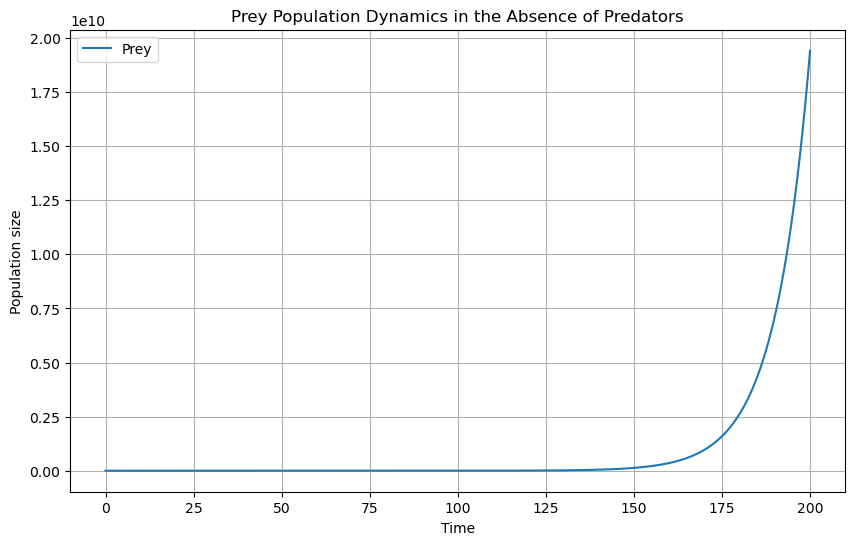

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def prey_growth(t, alpha, x0):
    return x0 * np.exp(alpha * t)

# Initial population size
initial_prey = 40

# Parameters for prey growth
alpha = 0.1  # Intrinsic growth rate

# Time span
t_span = (0, 200)

# Time points for evaluation
t_eval = np.linspace(0, 200, 1000)

# Solve the differential equations for prey growth
solution = prey_growth(t_eval, alpha, initial_prey)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_eval, solution, label='Prey')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('Prey Population Dynamics in the Absence of Predators')
plt.legend()
plt.grid(True)
plt.show()


# References
Takeuchi, Y. (1996). Global Dynamical Properties of Lotka-Volterra Systems. World Scientific.

Yoshida, T., Jones, L. E., Ellner, S. P., Fussmann, G. F., & Hairston Jr, N. G. (2003). Rapid evolution drives ecological dynamics in a predator–prey system. Nature, 424(6946), 303–306. 

Tabiś, B., & Skoneczny, S. (2013). Stabilization of unstable steady states of a continuous stirred tank bioreactor with predator–prey kinetics. Journal of Biotechnology, 166(4), 145–151.